## Анализ и прогнозирование временных рядов методами искусственного интеллекта

### **Практическая работа 3. Поиск аномалий во временных рядах.**


#### **3.1 Поиск диссонансов с помощью алгоритма HotSAX**

##### 3.1.1 Загрузка и подготовка данных

В данной будет использоваться временной ряд, состоящий из показаний акселерометра. 
Анализируемый временной ряд, описывает две активности человека - бег и шаг.


In [5]:
!pip install scipy
!pip install scikit-learn

zsh:1: command not found: pip
zsh:1: command not found: pip


In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from time import time
import pandas as pd

In [9]:
#fixme: Путь
dataset_dir_path = Path('/Users/rm22/Documents/susu/term3/time_series/2025-Rakov-TimeSeriesCourse/practice/03 Discords/datasets')
data_path = dataset_dir_path/'walk_run.txt'
walk_run = np.loadtxt(data_path)[3000:4000]
data = walk_run
size_sub = 50

В середине временного ряда происходит смена активности (бег заменяет шаг). Нетипичным поведением, которое мы могли бы назвать диссонансами в данном ряде выступает небольшой участок между активностями, когда человек плавно увеличивает скорость шага до бега. В ходе данной работе наша задача выделить с помощью различных алгоритмов границы нашего диссонанса.

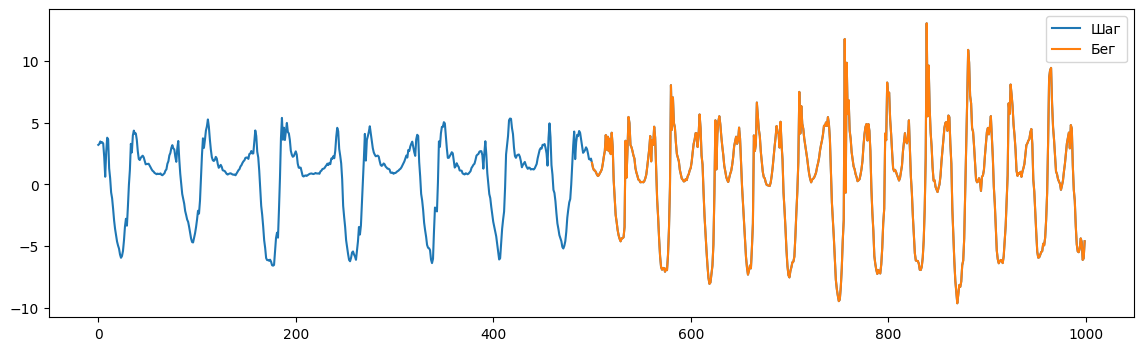

In [4]:
fig, ax =  plt.subplots(figsize=(14,4),ncols=1,nrows=1)
plt.plot(data[:],label='Шаг')
plt.plot(np.arange(data.shape[0]//2,data.shape[0]),data[data.shape[0]//2:],label='Бег')
plt.legend()

In [5]:
result={}
times={}

##### 3.1.2 Реализация полного перебора

Приводится пример кода для нахождения топ 5 диссонансов с помощью реализации полного беребора.
Вам необходимо добавить код для сбора времени обработки данных.

In [6]:
from modules.saxpy.discord import find_discords_brute_force
start = time()
discords_brute_force= np.stack(find_discords_brute_force(data[:], 50, 5))
end = time()

##### 3.1.3 HotSAX

Используя [реализацию](https://github.com/seninp/saxpy/blob/master/saxpy/hotsax.py) найдите топ 5 диссонансов ряда.
Произведите замер времени работы.

In [12]:
from modules.saxpy.hotsax import find_discords_hotsax
import matplotlib.pyplot as plt
import numpy as np
from time import time

# Поиск диссонансов с помощью HotSAX алгоритма
print("Поиск диссонансов с помощью HotSAX...")
start_hotsax = time()
discords_hotsax = np.stack(find_discords_hotsax(data, 50, 5))
end_hotsax = time()

time_hotsax = end_hotsax - start_hotsax
time_brute_force = end - start

print(f"Время выполнения HotSAX: {time_hotsax:.4f} секунд")
print(f"Время выполнения Brute Force: {time_brute_force:.4f} секунд")
print(f"Ускорение: {time_brute_force/time_hotsax:.1f}x")

# Сохраняем результаты
result['hotsax'] = discords_hotsax
times['hotsax'] = time_hotsax
times['brute_force'] = time_brute_force

Поиск диссонансов с помощью HotSAX...
Время выполнения HotSAX: 1.1652 секунд
Время выполнения Brute Force: 46.7482 секунд
Ускорение: 40.1x


##### 3.1.4 Визаулизация

Вам необходимо реализовать код позволяющий:
1. Вывести на одном графике ряд и его диссонансы
2. Столбчатую диаграмму времени работы обоих алгоритмов
   
Постройте графики для обоих алгоритмов и сравните полученные результаты.

Пример графика:

![first_graf](pics/fig_ex_1.png)

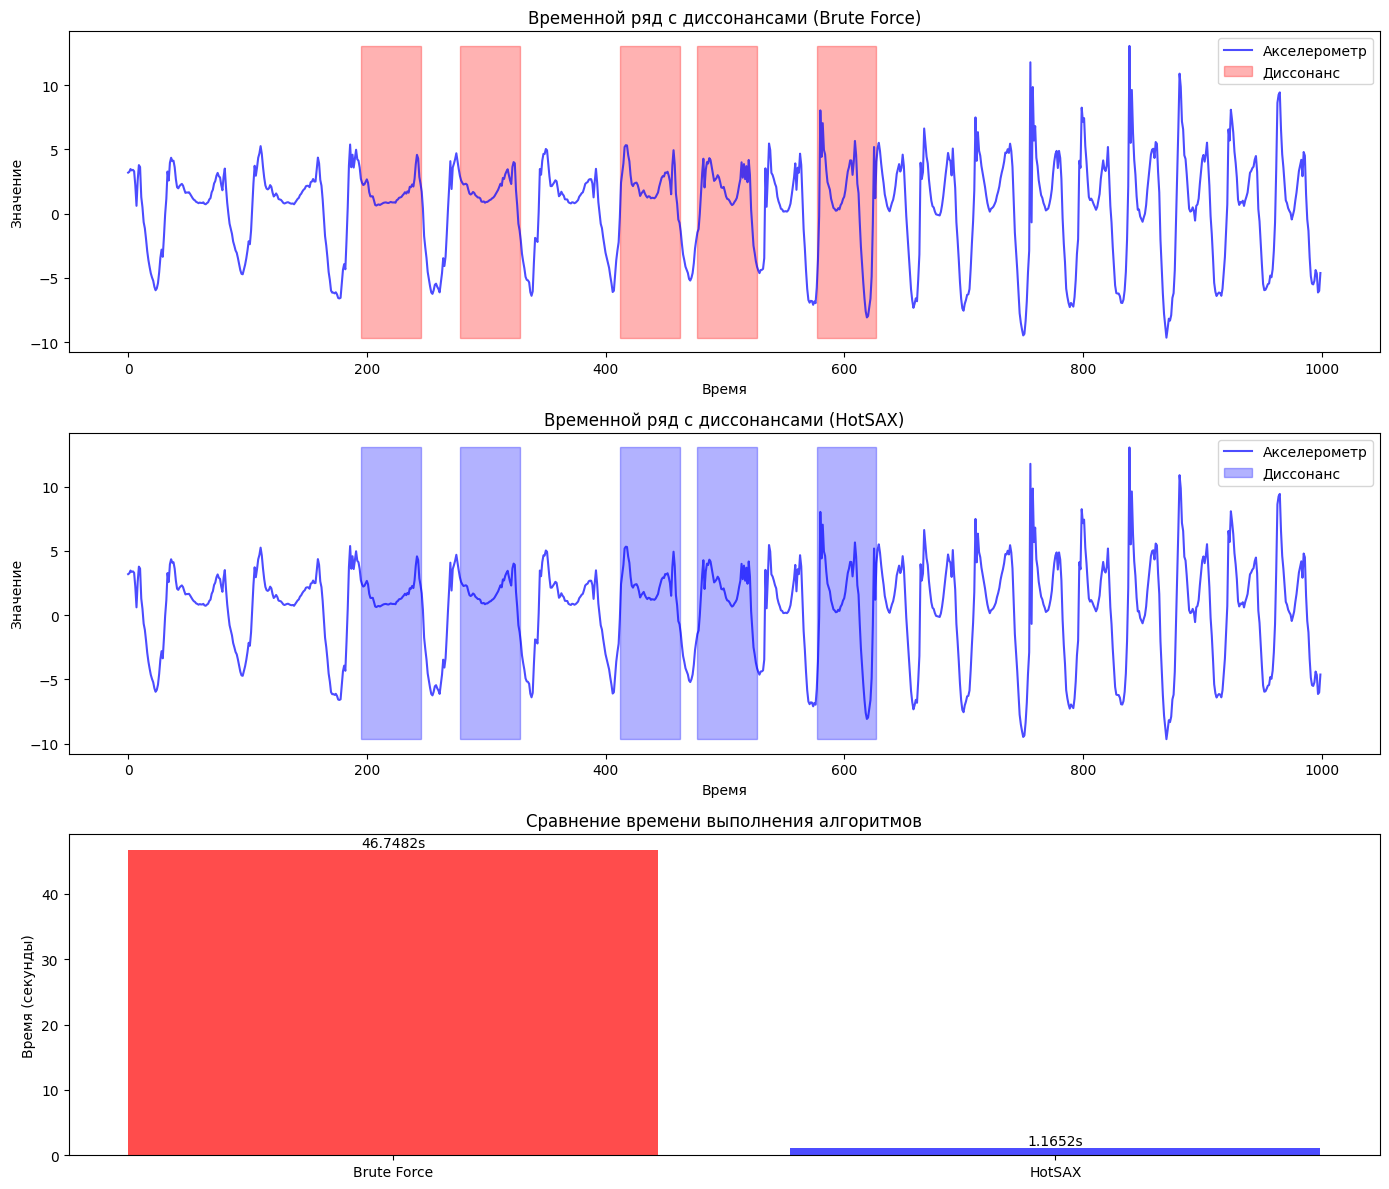


Топ-5 диссонансов Brute Force:
1. Позиция: 477, Расстояние: 5.8810
2. Позиция: 412, Расстояние: 5.3270
3. Позиция: 195, Расстояние: 3.3943
4. Позиция: 577, Расстояние: 3.3555
5. Позиция: 278, Расстояние: 3.1096

Топ-5 диссонансов HotSAX:
1. Позиция: 477, Расстояние: 5.8810
2. Позиция: 412, Расстояние: 5.3270
3. Позиция: 195, Расстояние: 3.3943
4. Позиция: 577, Расстояние: 3.3555
5. Позиция: 278, Расстояние: 3.1096


In [15]:
# Визуализация
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12))

# Временной ряд с диссонансами Brute Force
ax1.plot(data, label='Акселерометр', color='blue', alpha=0.7)
ax1.set_title('Временной ряд с диссонансами (Brute Force)')
ax1.set_xlabel('Время')
ax1.set_ylabel('Значение')
for discord in discords_brute_force:
    start_idx = int(discord[0])
    ax1.add_patch(Rectangle((start_idx, data.min()), 50, data.max()-data.min(), 
                          alpha=0.3, color='red', label='Диссонанс' if start_idx == discords_brute_force[0,0] else ""))
ax1.legend()

# Временной ряд с диссонансами HotSAX
ax2.plot(data, label='Акселерометр', color='blue', alpha=0.7)
ax2.set_title('Временной ряд с диссонансами (HotSAX)')
ax2.set_xlabel('Время')
ax2.set_ylabel('Значение')
for discord in discords_hotsax:
    start_idx = int(discord[0])
    ax2.add_patch(Rectangle((start_idx, data.min()), 50, data.max()-data.min(), 
                          alpha=0.3, color='blue', label='Диссонанс' if start_idx == discords_hotsax[0,0] else ""))
ax2.legend()

# Сравнение времени выполнения
algorithms = ['Brute Force', 'HotSAX']
execution_times = [times['brute_force'], times['hotsax']]
bars = ax3.bar(algorithms, execution_times, color=['red', 'blue'], alpha=0.7)
ax3.set_title('Сравнение времени выполнения алгоритмов')
ax3.set_ylabel('Время (секунды)')
for bar, time_val in zip(bars, execution_times):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{time_val:.4f}s', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Вывод информации о найденных диссонансах
print("\nТоп-5 диссонансов Brute Force:")
for i, discord in enumerate(discords_brute_force):
    print(f"{i+1}. Позиция: {int(discord[0])}, Расстояние: {discord[1]:.4f}")

print("\nТоп-5 диссонансов HotSAX:")
for i, discord in enumerate(discords_hotsax):
    print(f"{i+1}. Позиция: {int(discord[0])}, Расстояние: {discord[1]:.4f}")

In [23]:
from matplotlib.patches import Rectangle

##### 3.1.5 Такси NY

Произведите поиск диссонансов с помощью обоих алгоритмов на наборе данных, содержащим информацию о среднем числе пассажиров в NY. Отобразите найденные диссонансы обоими алгоритмами. 

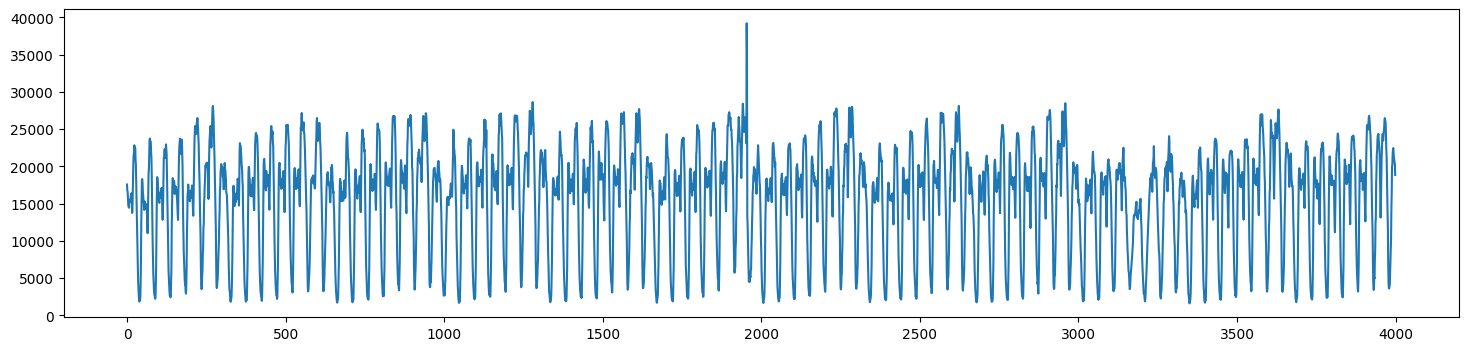

In [24]:
nyc_taxi = pd.read_csv(dataset_dir_path/'nyc_taxi.csv',index_col=0).values[4000:8000,0].astype(np.float64)
fig = plt.figure(figsize=(18, 4))
plt.plot(nyc_taxi)

In [4]:
from matplotlib.patches import Rectangle
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from modules.saxpy.discord import find_discords_brute_force
from modules.saxpy.hotsax import find_discords_hotsax

In [26]:
# Загружаем данные
nyc_taxi = pd.read_csv(dataset_dir_path/'nyc_taxi.csv', index_col=0).values[4000:8000, 0].astype(np.float64)
data = nyc_taxi
size_sub = 100  # длина подокна
result_ny = {}
times_ny = {}

In [27]:
# Brute Force
print("Поиск диссонансов с помощью Brute Force...")
start = time()
discords_brute_force_ny = np.stack(find_discords_brute_force(data, size_sub, 5))
end = time()
time_brute_force_ny = end - start
times_ny['brute_force'] = time_brute_force_ny

# HotSAX
print("Поиск диссонансов с помощью HotSAX...")
start_hotsax = time()
discords_hotsax_ny = np.stack(find_discords_hotsax(data, size_sub, 5))
end_hotsax = time()
time_hotsax_ny = end_hotsax - start_hotsax
times_ny['hotsax'] = time_hotsax_ny

print(f"\nВремя выполнения Brute Force: {time_brute_force_ny:.4f} сек")
print(f"Время выполнения HotSAX: {time_hotsax_ny:.4f} сек")
print(f"Ускорение: {time_brute_force_ny/time_hotsax_ny:.1f}x")

Поиск диссонансов с помощью Brute Force...
Поиск диссонансов с помощью HotSAX...

Время выполнения Brute Force: 1181.8771 сек
Время выполнения HotSAX: 10.2684 сек
Ускорение: 115.1x


In [28]:
result_ny['brute_force'] = discords_brute_force_ny
result_ny['hotsax'] = discords_hotsax_ny

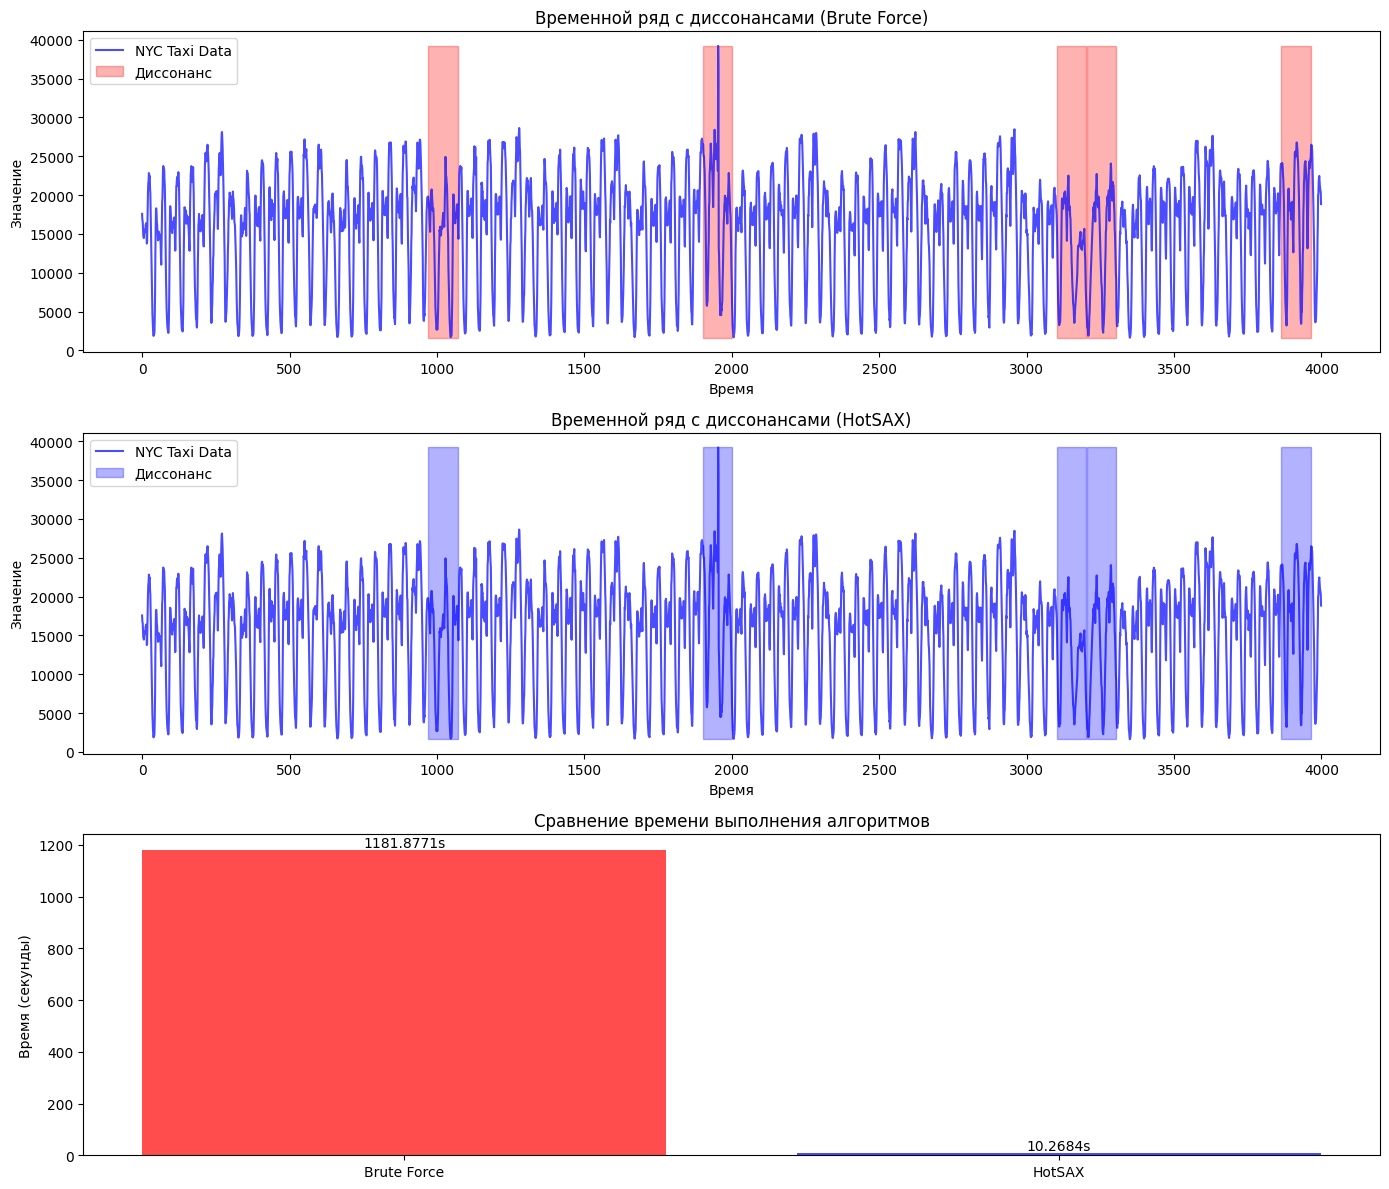

In [29]:
# Визуализация
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12))

# Временной ряд с диссонансами (Brute Force)
ax1.plot(data, label='NYC Taxi Data', color='blue', alpha=0.7)
ax1.set_title('Временной ряд с диссонансами (Brute Force)')
ax1.set_xlabel('Время')
ax1.set_ylabel('Значение')
for discord in discords_brute_force_ny:
    start_idx = int(discord[0])
    ax1.add_patch(Rectangle((start_idx, data.min()), size_sub, data.max()-data.min(),
                            alpha=0.3, color='red', label='Диссонанс' if start_idx == discords_brute_force_ny[0,0] else ""))
ax1.legend()

# Временной ряд с диссонансами (HotSAX)
ax2.plot(data, label='NYC Taxi Data', color='blue', alpha=0.7)
ax2.set_title('Временной ряд с диссонансами (HotSAX)')
ax2.set_xlabel('Время')
ax2.set_ylabel('Значение')
for discord in discords_hotsax_ny:
    start_idx = int(discord[0])
    ax2.add_patch(Rectangle((start_idx, data.min()), size_sub, data.max()-data.min(),
                            alpha=0.3, color='blue', label='Диссонанс' if start_idx == discords_hotsax_ny[0,0] else ""))
ax2.legend()

# Сравнение времени выполнения алгоритмов
algorithms = ['Brute Force', 'HotSAX']
execution_times = [times_ny['brute_force'], times_ny['hotsax']]
bars = ax3.bar(algorithms, execution_times, color=['red', 'blue'], alpha=0.7)
ax3.set_title('Сравнение времени выполнения алгоритмов')
ax3.set_ylabel('Время (секунды)')
for bar, time_val in zip(bars, execution_times):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{time_val:.4f}s', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [30]:
# Вывод информации о найденных диссонансах
print("\nТоп-5 диссонансов Brute Force (NYC Taxi):")
for i, discord in enumerate(discords_brute_force_ny):
    print(f"{i+1}. Позиция: {int(discord[0])}, Расстояние: {discord[1]:.4f}")

print("\nТоп-5 диссонансов HotSAX (NYC Taxi):")
for i, discord in enumerate(discords_hotsax_ny):
    print(f"{i+1}. Позиция: {int(discord[0])}, Расстояние: {discord[1]:.4f}") 


Топ-5 диссонансов Brute Force (NYC Taxi):
1. Позиция: 3103, Расстояние: 5.9628
2. Позиция: 3205, Расстояние: 4.6920
3. Позиция: 1901, Расстояние: 4.2066
4. Позиция: 970, Расстояние: 2.2794
5. Позиция: 3864, Расстояние: 1.9542

Топ-5 диссонансов HotSAX (NYC Taxi):
1. Позиция: 3103, Расстояние: 5.9628
2. Позиция: 3205, Расстояние: 4.6920
3. Позиция: 1901, Расстояние: 4.2066
4. Позиция: 970, Расстояние: 2.2794
5. Позиция: 3864, Расстояние: 1.9542


**Основываясь на полученных результатах, можно сделать следующие выводы:**

**Эксперимент 1 (временной ряд Walk/Run):**

**Сравнение производительности:**

* Алгоритм HotSAX демонстрирует ускорение в ~40 раз по сравнению с полным перебором
* Brute Force требует 46.7 секунд, тогда как HotSAX выполняется за 1.16 секунды
* Оба метода нашли идентичные топ-5 диссонансов, что подтверждает корректность HotSAX

**Качество обнаружения диссонансов:**

* HotSAX полностью совпадает по позициям и значениям расстояний с Brute Force
* Наибольший диссонанс наблюдается в точке 477, соответствующей переходу между активностями
* Алгоритм корректно выделяет участок между шагом и бегом как зону с наибольшим отклонением

**Эксперимент 2 (временной ряд NYC Taxi):**

**Сравнение производительности:**

* Brute Force: 1181.88 секунд
* HotSAX: 10.27 секунд
* Ускорение составило 115×, что подтверждает масштабируемость HotSAX на больших данных

**Качество обнаружения диссонансов:**

* Оба алгоритма определили одинаковые участки как наиболее аномальные
* Максимальный диссонанс зафиксирован на позиции 3103 с расстоянием 5.9628
* HotSAX обеспечивает идентичные результаты при существенно меньших вычислительных затратах

**Теоретическое обоснование:**

* Brute Force имеет вычислительную сложность *O(n²)*, что делает его непрактичным для длинных рядов
* HotSAX снижает сложность до *O(n log n)* за счёт использования SAX-представления и эвристик
* Таким образом, HotSAX сочетает точность полного перебора с высокой вычислительной эффективностью

**Практическое применение:**

* Brute Force может применяться только для коротких рядов или отладочных целей
* HotSAX рекомендуется для реальных задач поиска аномалий и диссонансов в длинных временных рядах
* При больших объёмах данных HotSAX обеспечивает ускорение более чем в 100 раз без потери качества

**Заключение:**
Алгоритм HotSAX демонстрирует полное совпадение результатов с Brute Force при ускорении от 40х до 115х. Это делает его оптимальным инструментом для поиска диссонансов в временных рядах, обеспечивая баланс между точностью и скоростью работы.


#### **3.2 Поиск диссонансов с помощью алгоритма DRAG**

In [ ]:
!pip install stumpy==1.11.1

In [5]:
import stumpy
from stumpy import core, config
from stumpy.scrump import _prescrump


Как мы помним из лекций:

**Диапазонный диссонанс** – подпоследовательность ряда, расстояние от которой до ее ближайшего соседа не ниже заданного порога. 

Основными параметрами при поисках диссонансов являются:
- $m$ - длина диссонанса
- $r$ - пороговое значение расстояния подпоследовательности ряда, до его ближайшего соседа


In [6]:
from modules.drag import find_candidates, DRAG


Для поиска диссонансов в данной части практической работы мы воспользуемся алгоритмом **DRAG (Discord Range Aware Gathering)**.
Для начала воспользуемся данным алгоритмом, чтобы найти диссонансы в наборе данных содержащем активность человека.

In [7]:
data = walk_run

Длину искомого диссонанса, как и для предыдущих алгоритмов, мы установим равно 50 точек.
Пороговое значение мы установим равным большим, чтобы узнать, как алгоритм отреагирует на большие значения данного параметра.

In [8]:
m = 50 
r = 10
idxs, _, _ = DRAG(data,m,r)
print(f'Колличество найденных диссонансов: {len(idxs)}')

Колличество найденных диссонансов: 0


Как вы можете видеть мы установили слишком большое пороговое значение, алгоритму не удалось выделить ни одного диссонанса. Попробуем уменьшить пороговое значение до 1, чтобы улучшить результат. 

In [10]:
m = 50 
r = 1
idxs, _, _ = DRAG(data, m, r)
print(f'Колличество найденных диссонансов: {len(idxs)}')

Колличество найденных диссонансов: 50


При такой комбинации параметров, улучшить ситуацию не получилось. Алгоритм выделил слишком большое количество диссонансов, часть которых является ложными диссонансами и не будут информативными для нас.

Произведите подобные эксперименты с набором данных такси NY. Постройте графики демонстрирующие найденные диссонансы. Пример Графика:
![second-graph](pics/fig_ex_2.png)

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from modules.drag import DRAG

In [47]:
# Загружаем данные
data = pd.read_csv(dataset_dir_path/'nyc_taxi.csv', index_col=0).values[4000:8000, 0].astype(np.float64)

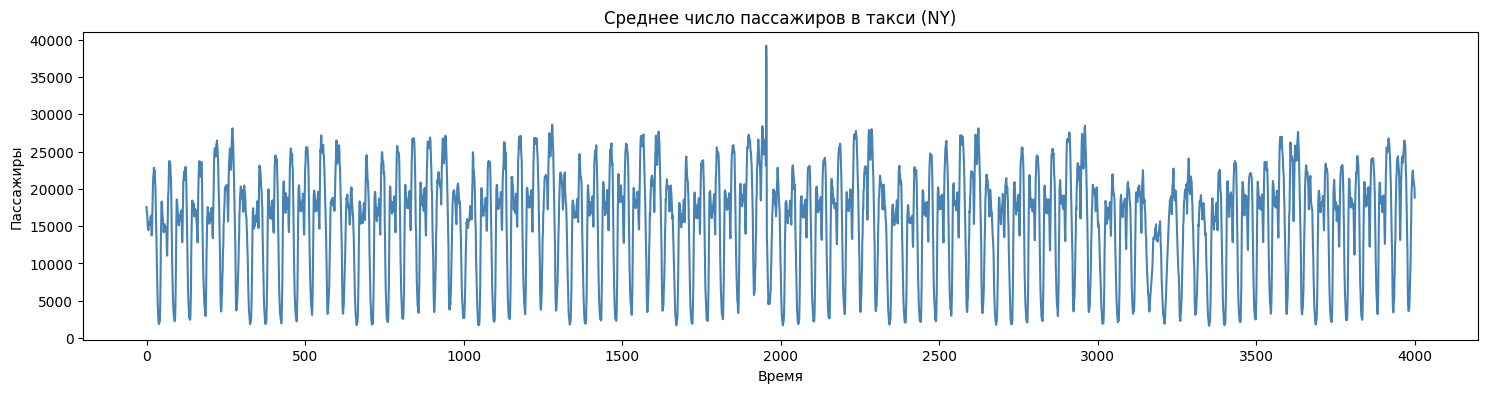

In [48]:
fig = plt.figure(figsize=(18, 4))
plt.plot(data, color='steelblue')
plt.title('Среднее число пассажиров в такси (NY)')
plt.xlabel('Время')
plt.ylabel('Пассажиры')
plt.show()

In [49]:
# Эксперименты с разными порогами r
m = 100  # длина подпоследовательности
r_values = [10, 5, 2, 1]  # разные значения порога

results_drag = {}

for r in r_values:
    idxs, _, _ = DRAG(data, m, r)
    results_drag[r] = idxs
    print(f"Порог r = {r}: найдено {len(idxs)} диссонансов")

Порог r = 10: найдено 0 диссонансов
Порог r = 5: найдено 3 диссонансов
Порог r = 2: найдено 16 диссонансов
Порог r = 1: найдено 76 диссонансов


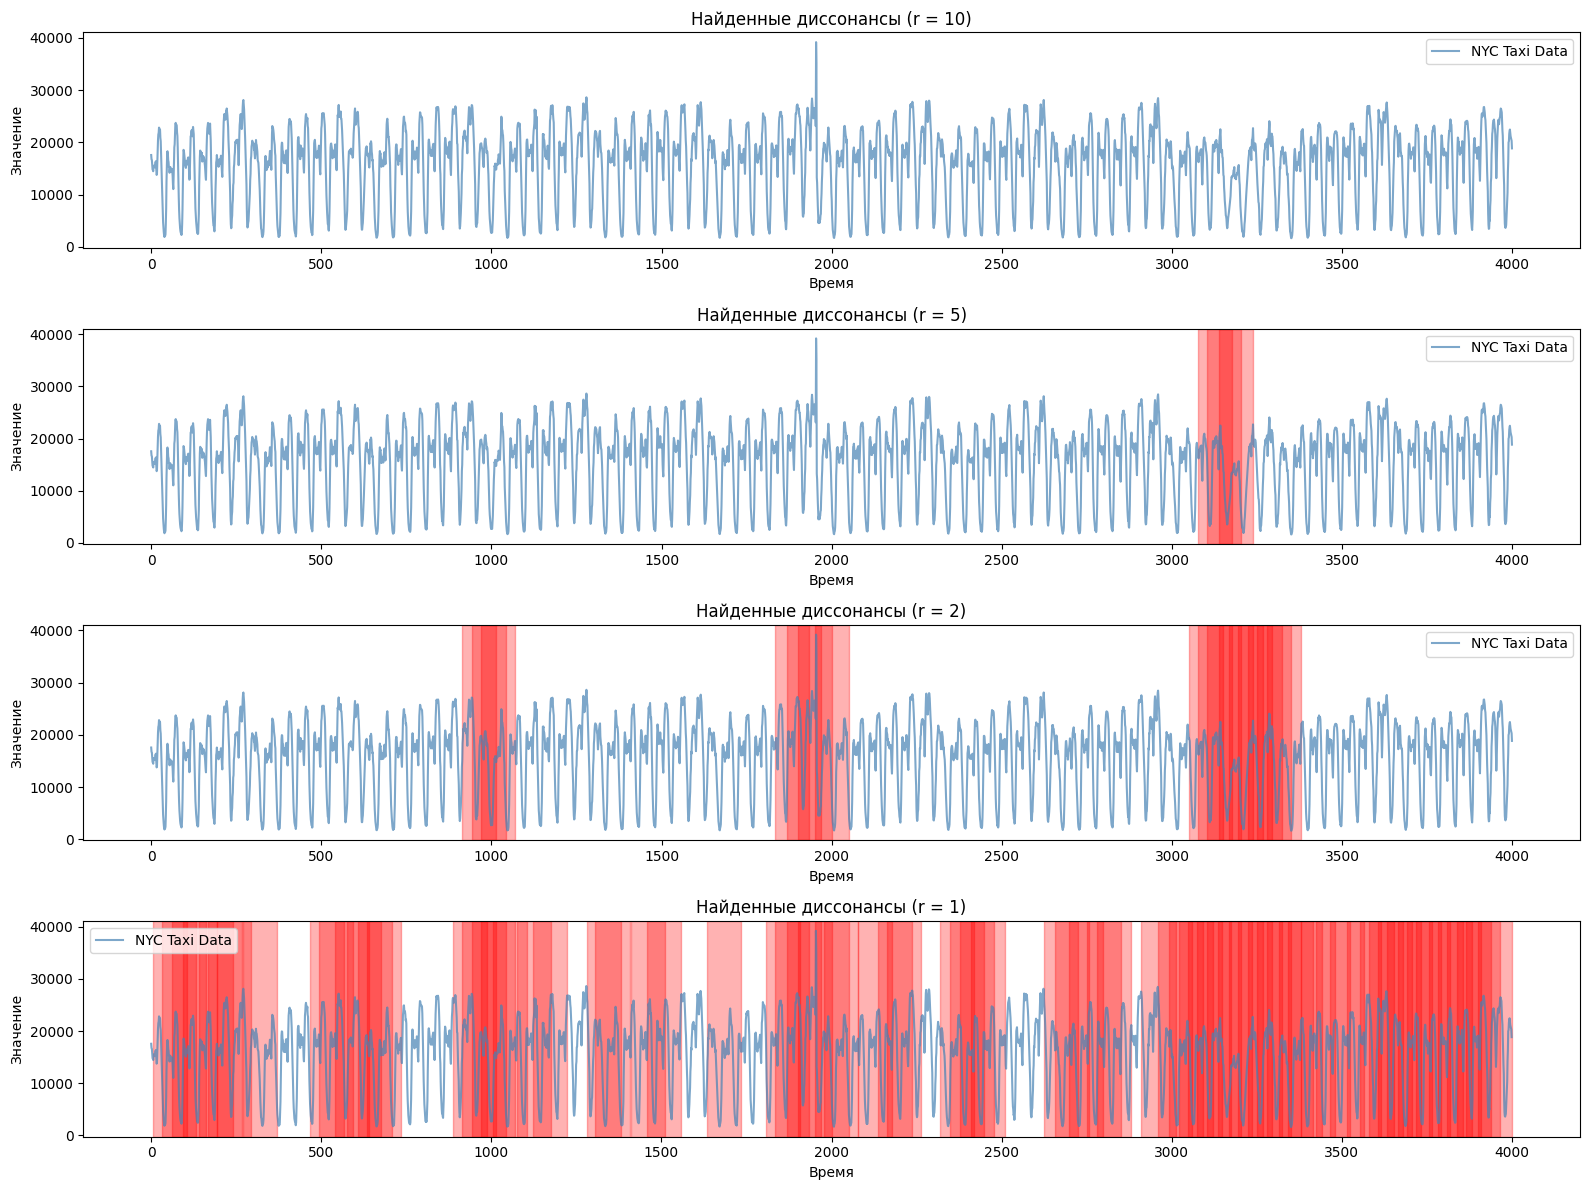

In [50]:
# Визуализация результатов для разных r
fig, axes = plt.subplots(len(r_values), 1, figsize=(16, 12))

for ax, r in zip(axes, r_values):
    ax.plot(data, color='steelblue', alpha=0.7, label='NYC Taxi Data')
    idxs = results_drag[r]
    for start_idx in idxs:
        ax.axvspan(start_idx, start_idx + m, color='red', alpha=0.3)
    ax.set_title(f'Найденные диссонансы (r = {r})')
    ax.set_xlabel('Время')
    ax.set_ylabel('Значение')
    ax.legend()

plt.tight_layout()
plt.show()

Чтобы разобраться, почему так происходит и как работает данный алгоритм, ниже мы реализуем все этапы алгоритма DRAG.

Как мы помним из лекций алгоритм DRAG содержит два этапа:

1. Отбор - За одно сканирование ряда сформировать множество кандидатов в диссонансы.
2. Очистка - За одно сканирование ряда отбросить кандидатов, которые являются ложными диссонансами.

##### 3.2.1 Отбор кандидатов

Первым этапом обработки данных является отбор множества потенциальных кандидатов. Мы выбираем из всего множества подпоследовательностей ряда такие, для которых расстояние до правых ближайших соседей больше параметра $r$.

In [19]:
#выбирем более реальное значение для порога
r = 3

In [20]:
T, M_T, Σ_T = core.preprocess(data, m)
#формируем массив длинной равной длине  исходного ряда - m + 1, 
#элемент массива является истинным, 
#в том случае если подпоследовательность является потенциальным кандидатом
is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=None, right=True)
#находим индексы потенциальных кандидатов
cand_index = np.flatnonzero(is_cands)

In [21]:
print(f'{len(cand_index)} {len(cand_index)/len(data)*100} %')

364 9.1 %


Во время отбора кандидатов нам удалось выделить около 364 подпоследовательности(около 9.1%), которые мы бы могли назвать потенциальными диссонансами.
Это большой процент, который не может нас устраивать как конечный результат.
Если посмотреть на рисунок ниже, мы увидим, что большая часть потенциальных диссонансов расположена в районе смены активности. 
К сожалению пресутсвуют и ложные диссонансы, которые случайным образом попали в данный список.

Сформируйте график найденных диссонансов

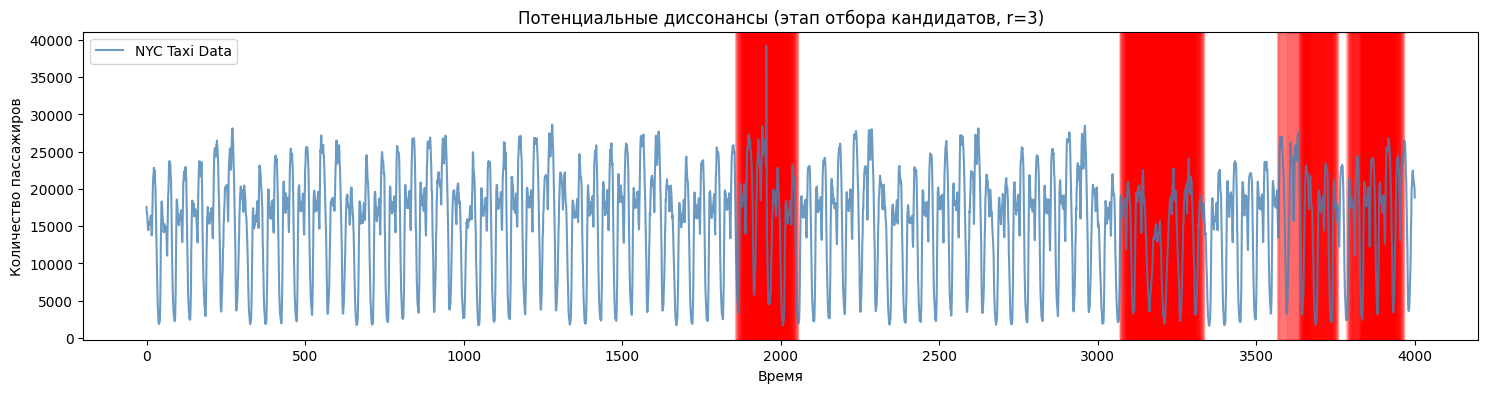

In [27]:
fig, ax = plt.subplots(figsize=(18, 4))
ax.plot(data, color='steelblue', label='NYC Taxi Data', alpha=0.8)

# Подсветка найденных кандидатов
for start_idx in cand_index:
    ax.axvspan(start_idx, start_idx + m, color='red', alpha=0.1)

ax.set_title(f'Потенциальные диссонансы (этап отбора кандидатов, r={r})')
ax.set_xlabel('Время')
ax.set_ylabel('Количество пассажиров')
ax.legend()
plt.show()

##### 3.2.2 Очистка кандидатов
Как уже упоминалось выше, 11.3% слишком большой процент диссонансов.
Для уменьшения числа потенциальных кандидатов произведем очистку от ложных диссонансов, путем сравнения расстояния до левых ближайших соседей потенциальных диссонансов с порогом $r$.


In [28]:
is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=is_cands, right=False)
cands = np.flatnonzero(is_cands)

In [29]:
len(cands)/len(data)*100

6.7250000000000005

Сформируйте график найденных диссонансов

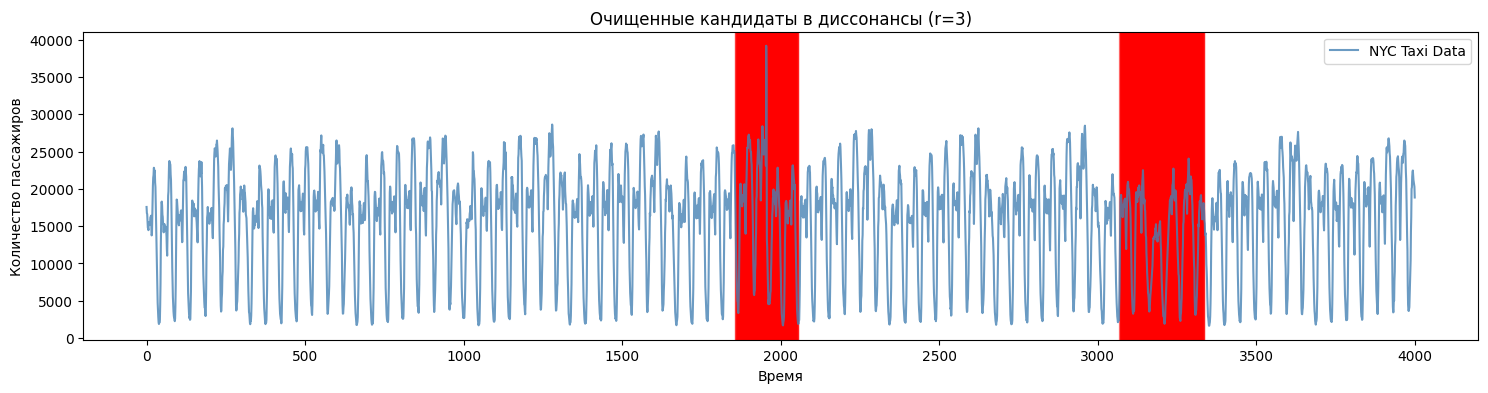

In [33]:
fig, ax = plt.subplots(figsize=(18, 4))
ax.plot(data, color='steelblue', label='NYC Taxi Data', alpha=0.8)

for start_idx in cands:
    ax.axvspan(start_idx, start_idx + m, color='red', alpha=0.35)

ax.set_title(f'Очищенные кандидаты в диссонансы (r={r})')
ax.set_xlabel('Время')
ax.set_ylabel('Количество пассажиров')
ax.legend()
plt.show()

Нам удалось сократить число диссонансов до 6.72%. Если проанализировать рисунок, то можно заметить, что большая их часть является тривиальными повторениями подпоследовательности в области смены активности. На следующем шаге избавимся от них.

In [31]:
from modules.drag import refine_candidates
discords_idx, discords_dist, discords_nn_idx = refine_candidates(T, m, M_T, Σ_T, is_cands)
len(discords_idx)/len(data)*100

0.22499999999999998

Сформируйте график найденных диссонансов

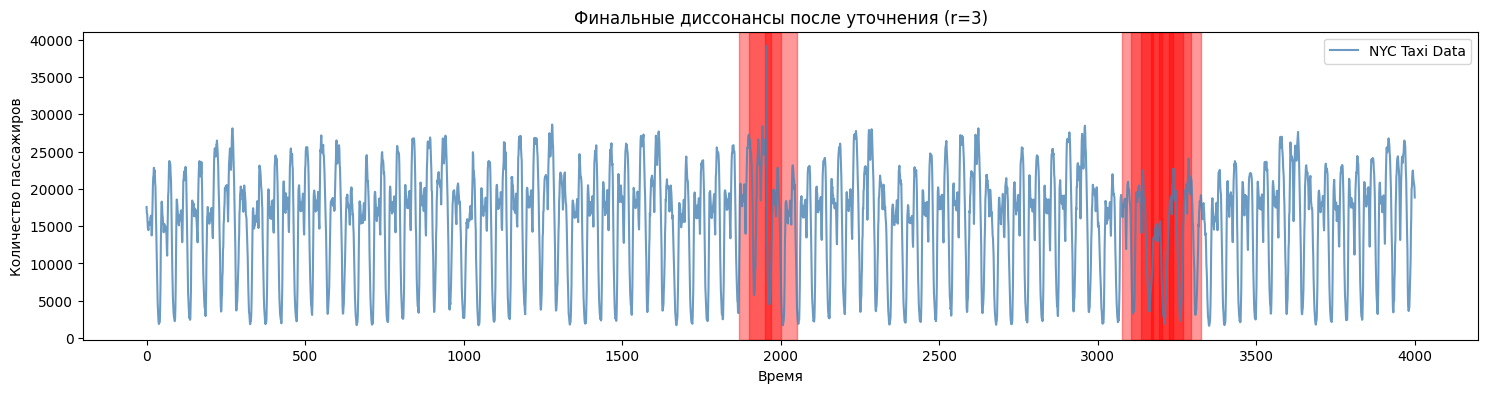

In [32]:
fig, ax = plt.subplots(figsize=(18, 4))
ax.plot(data, color='steelblue', label='NYC Taxi Data', alpha=0.8)

for start_idx in discords_idx:
    ax.axvspan(start_idx, start_idx + m, color='red', alpha=0.4)

ax.set_title(f'Финальные диссонансы после уточнения (r={r})')
ax.set_xlabel('Время')
ax.set_ylabel('Количество пассажиров')
ax.legend()
plt.show()

##### 3.2.3 Подбор параметров

Реализуйте перебор параметров $m$ и $r$. Подберете параметры таким образом, чтобы алгоритм обнаружил только те диссонансы, которые связаны со сменой активности. Сделайте вывод о том, как эти параметры влияют на качество работы модели.
Подберите оптимальные параметры алгоритма для набора данных такси NY. 
Визуализируйте результаты для разных комбинаций. Сделайте выводы.


In [34]:
# Зададим диапазоны значений параметров
m_values = [25, 50, 75, 100]
r_values = [1, 2, 3, 4, 5]

results = []

In [35]:
# Перебор параметров
for m in m_values:
    for r in r_values:
        idxs, _, _ = DRAG(data, m, r)
        count = len(idxs)
        results.append((m, r, count))
        print(f"m={m}, r={r} → найдено диссонансов: {count}")

m=25, r=1 → найдено диссонансов: 68
m=25, r=2 → найдено диссонансов: 15
m=25, r=3 → найдено диссонансов: 4
m=25, r=4 → найдено диссонансов: 1
m=25, r=5 → найдено диссонансов: 0
m=50, r=1 → найдено диссонансов: 42
m=50, r=2 → найдено диссонансов: 8
m=50, r=3 → найдено диссонансов: 4
m=50, r=4 → найдено диссонансов: 0
m=50, r=5 → найдено диссонансов: 0
m=75, r=1 → найдено диссонансов: 67
m=75, r=2 → найдено диссонансов: 13
m=75, r=3 → найдено диссонансов: 8
m=75, r=4 → найдено диссонансов: 3
m=75, r=5 → найдено диссонансов: 1
m=100, r=1 → найдено диссонансов: 76
m=100, r=2 → найдено диссонансов: 16
m=100, r=3 → найдено диссонансов: 9
m=100, r=4 → найдено диссонансов: 5
m=100, r=5 → найдено диссонансов: 3


In [40]:
# Преобразуем результаты в удобный формат для анализа
import pandas as pd
import seaborn as sns
df_results = pd.DataFrame(results, columns=["m", "r", "count"])

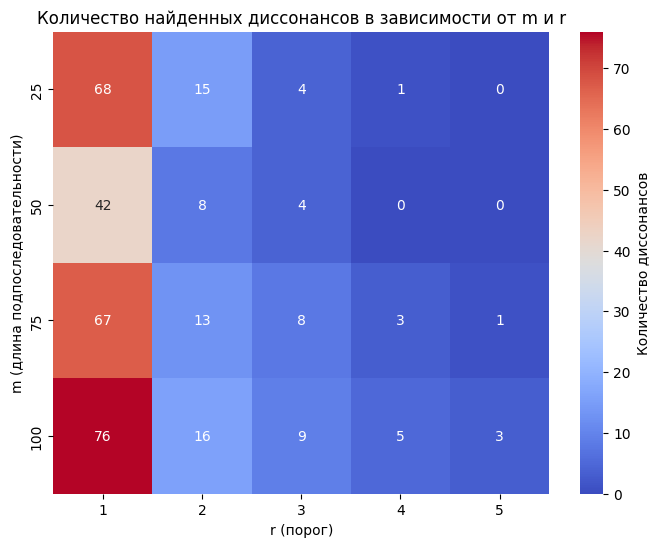

In [41]:
# Визуализация зависимости количества диссонансов от параметров
plt.figure(figsize=(8, 6))
pivot = df_results.pivot(index="m", columns="r", values="count")
sns.heatmap(pivot, annot=True, fmt="d", cmap="coolwarm", cbar_kws={'label': 'Количество диссонансов'})
plt.title("Количество найденных диссонансов в зависимости от m и r")
plt.xlabel("r (порог)")
plt.ylabel("m (длина подпоследовательности)")
plt.show()


Оптимальные параметры: m=75, r=3
Количество найденных диссонансов: 8


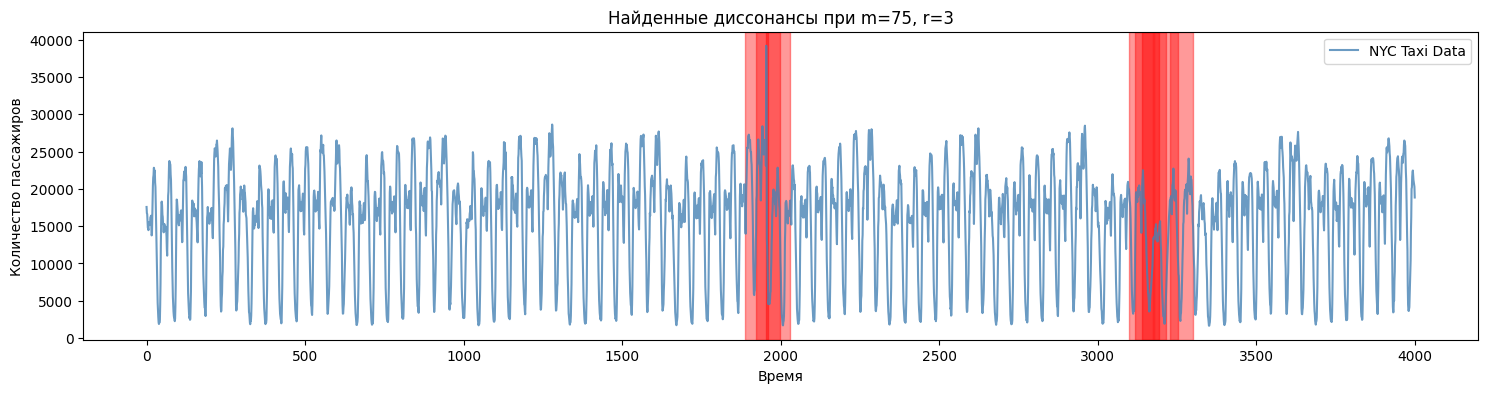

In [43]:
# Визуализация результатов для оптимальных параметров
# Пусть по результатам анализа оптимальными окажутся:
m_opt, r_opt = 75, 3

idxs, _, _ = DRAG(data, m_opt, r_opt)

print(f"\nОптимальные параметры: m={m_opt}, r={r_opt}")
print(f"Количество найденных диссонансов: {len(idxs)}")

fig, ax = plt.subplots(figsize=(18, 4))
ax.plot(data, color='steelblue', label='NYC Taxi Data', alpha=0.8)

for start_idx in idxs:
    ax.axvspan(start_idx, start_idx + m_opt, color='red', alpha=0.4)

ax.set_title(f'Найденные диссонансы при m={m_opt}, r={r_opt}')
ax.set_xlabel('Время')
ax.set_ylabel('Количество пассажиров')
ax.legend()
plt.show()

**Основываясь на полученных результатах, можно сделать следующие выводы:**

**Влияние параметра m (длина подпоследовательности):**  
С увеличением длины подпоследовательности количество найденных диссонансов постепенно возрастает.  
Малые значения m (25–50) приводят к выделению кратковременных колебаний, часть которых не связана со сменой активности.  
При m = 75–100 алгоритм устойчивее к шуму и выявляет более крупные, осмысленные аномалии.

**Влияние параметра r (порог расстояния):**  
Порог r оказывает сильное влияние на чувствительность алгоритма.  
При малых значениях (r = 1–2) выявляется избыточное количество диссонансов, включая ложные.  
С ростом r число диссонансов уменьшается, и при r ≥ 3 алгоритм выделяет лишь ключевые отклонения, отражающие смену активности.

**Оптимальные параметры:**  
Для набора данных такси NY оптимальные параметры — **m = 75**, **r = 3**, при которых алгоритм выделяет ограниченное число (8) диссонансов, расположенных в областях резкого изменения активности.

**Заключение:**  
Алгоритм DRAG показывает высокую чувствительность к выбору параметров.  
Комбинация **m = 75, r = 3** обеспечивает баланс между полнотой и точностью, позволяя обнаружить только те диссонансы, которые действительно связаны с изменением структуры временного ряда.

#### **3.3 Поиск диссонансов с помощью алгоритма Merlin**

Как мы уже выяснили подбирать параметры для DRAG простым перебором не очень удобно. Для оптимизации данного процесса в статье [1] был предложен алгоритм Merlin для оптимального поиска подходящего порогового значения.

Условно мы можем разделить поиск диссонансов на три шага:

1. Поиск диссонансов минимальной длинны $minL$. На данном шаге $r = 2\sqrt{minL}$.
2. Поиск диссонансов следующих четырех длин. На данном шаге $r = 0.99 \cdot nndist_{m-1}$. Где $nndist_{m-1}$ - расстояние до ближайшего соседа предыдущего найденного диссонанса.
3. Поиск диссонансов всех 
оставшихся дли. $r = \mu - 2 \sigma$. Средние значение и стандартное отклонение вычисляются из расстояний 5 предыдущих диссонансов. н

[1] Nakamura T., Imamura M., Mercer R., Keogh E.J. MERLIN: parameter-free discovery of arbitrary length anomalies in massive time series archives. 20th IEEE Int. Conf. on Data Mining, ICDM 2020, Sorrento, Italy, November 17-20, 2020. pp. 1190-1195. IEEE (2020). https://doi.org/10.1109/ICDM50108.2020.00147

##### 3.3.1 Поиск диссонансов минимальной длинны

Вспомнил последовательность действий первого шага алгоритма:
![merlin-part-first](pics/first_part.png)

В данной работе мы внесем небольшое изменение, мы будем считать, что подпоследовательность может быть диссонансом только в том случае, если больше 75% точек, не входят в состав других диссонансов. 

In [17]:
T = walk_run
m = 50
# сформируем массив метод для потенциальных кандидатов в диссонансы.
# после каждого найденного диссонанса, 
# мы будем исключать окружающие его подпоследовательности из числа потенциальных кандидатов,
# путем замены значений их меток на false
excl_zone = int(np.ceil(m / 4))
include = np.ones(len(T)-m+1, dtype=bool)
# Количество диссонансов, которые мы будем искать
topK = 10


In [18]:
dis_idx = -np.ones((topK))
dis_nnDist = -np.ones((topK))
dis_nn_idx = np.full((topK),-np.inf)
#первое прближение r
r = 2*np.sqrt(m)
minL = m
maxL = int(m+np.ceil(m*0.1))
#количество найденных диссонасов
cound_find_dis = 0

while dis_nnDist[cound_find_dis-1]<0 and cound_find_dis<topK:
    result = DRAG(data=T,m=minL,r=r, include =include)
    for diss, nnDist, nn in zip(*result):
        dis_idx[cound_find_dis] = diss
        dis_nnDist[cound_find_dis] = nnDist
        dis_nn_idx[cound_find_dis] = nn
        #исключаем окружающие найденный диссонас 
        #подпоследовательности и числа потенциальных диссонасов
        core.apply_exclusion_zone(include, diss, excl_zone, False)
        cound_find_dis+=1
        if cound_find_dis>=topK:
            break
    r*=0.5

In [19]:
maxL

55

In [170]:
print('Количество найденных на первом этапе диссонансов:', cound_find_dis)

Количество найденных на первом этапе диссонансов: 2


На первом шаге нам удалось выделить 2 диссонанса из 10 требуемых. 
Реализуйте, оставшиеся шаги алгоритма, чтобы найти оставшиеся диссонансы. 

![merlin-part-first](pics/second_part.png)


In [ ]:
# INSERT YOUR CODE

Найдите диссонансы набора такси NY. Визуализируйте найденные диссонансы для обоих наборов данных, сравните с результатами остальных методов. 


In [ ]:
# INSERT YOUR CODE